In [22]:
# import all the necessary library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
# load the dataset using sklearn
from sklearn.datasets import make_classification


In [24]:
# create a synthetic dataset 
x,y = make_classification(n_samples=1000,n_classes=2,n_features=2,n_clusters_per_class=2,n_redundant=0)

In [25]:
x

array([[ 0.59820646,  0.62699627],
       [-0.98647795,  0.99291988],
       [ 1.11444009, -0.93839689],
       ...,
       [-1.08470583, -1.04420469],
       [ 0.28293189, -0.93271551],
       [ 1.09762971, -1.08042513]])

In [26]:
pd.DataFrame(x)[0]

0      0.598206
1     -0.986478
2      1.114440
3     -1.286183
4     -0.338715
         ...   
995    1.811198
996   -1.104278
997   -1.084706
998    0.282932
999    1.097630
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

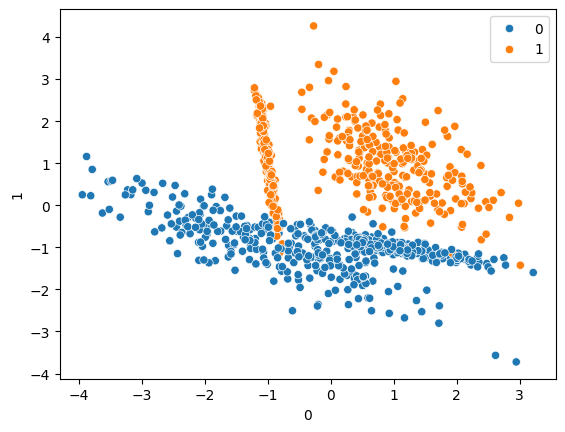

In [27]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [28]:
# split the data set into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC(kernel='linear')

In [31]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [32]:
svc.coef_

array([[0.89456036, 3.31990323]])

In [33]:
#prediction
y_pred = svc.predict(x_test)

In [34]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1])

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [16]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       128
           1       0.88      0.93      0.90       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[112  16]
 [  9 113]]
0.9


## **Hyper parameter tuning With SVC**

In [17]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear']
}

In [18]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.927 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.893 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.927 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
y_pred4 = grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       128
           1       0.88      0.93      0.90       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[112  16]
 [  9 113]]
0.9
